# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Telco Churn Prediction with Logistic Regression</b></p>
![](https://kranthi.me/wp-content/uploads/2020/04/Telecom_Churn_Prediction-e1587281300645.jpg)

<a id="toc"></a>
# **Table of Contents**

**1.**  [**Reading Data**](#Step1)<br>
**2.**  [**Understanding Data**](#Step2)<br>
**3.**  [**Data Visualization**](#Step3)<br>
**4.**  [**Data Preprocessing**](#Step4)<br>
**5.**  [**Model Building**](#Step5)<br>
**6.**  [**Model Evaluation**](#Step6)<br>
**7.**  [**Predicting New Data**](#Step7)<br>

<a id="Step1"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>1. Reading Dataset</b></p>
<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color: #8B0000" data-toggle="popover">Content</a>

In [3]:
import pandas as pd 
df = pd.read_csv("./data/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="Step2"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>2. Understanding Dataset</b></p>
<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color: #8B0000" data-toggle="popover">Content</a>

In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<a id="Step3"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>3. Data Visualization</b></p>
<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color: #8B0000" data-toggle="popover">Content</a>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.figsize": (10,6), "figure.dpi" : 300})

## What is the ratio between males and females in the company?

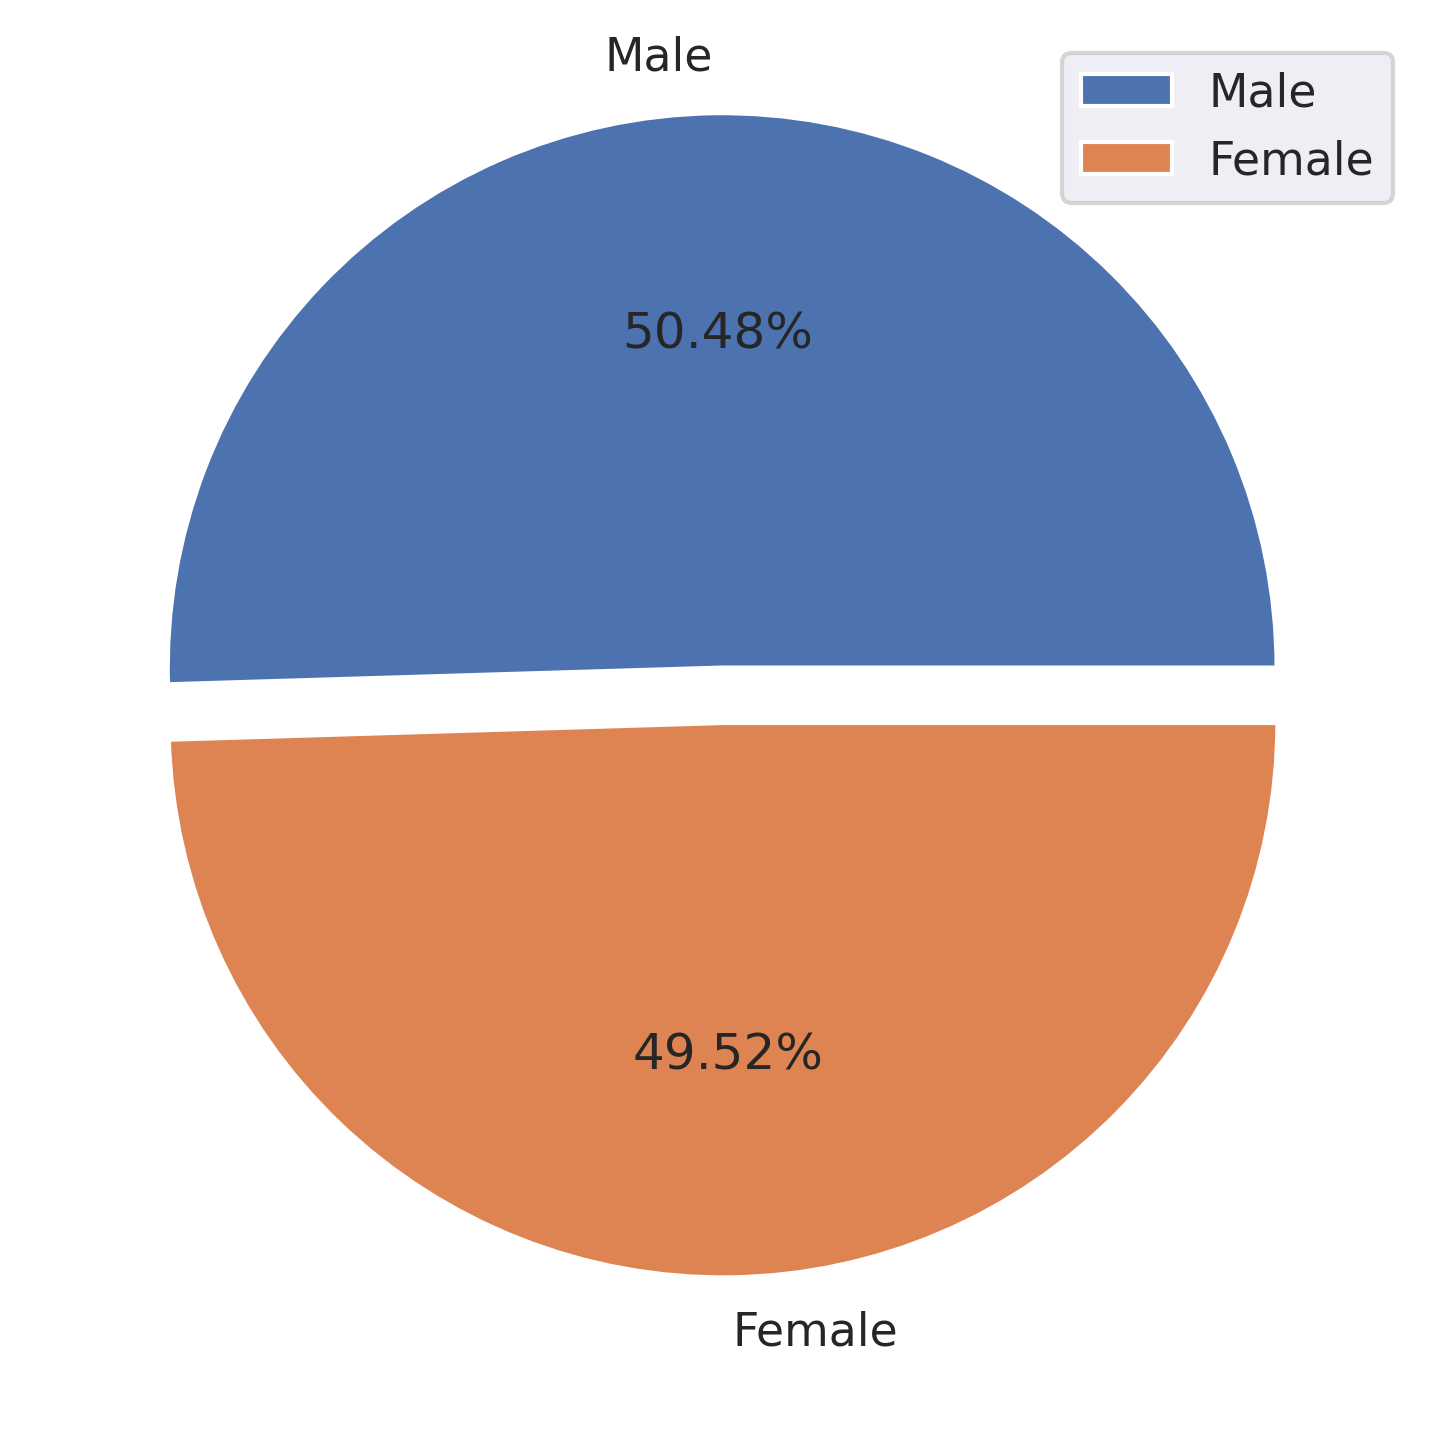

In [8]:
x = round(df["gender"].value_counts()/df.shape[0]*100,2)
plt.pie(x,labels = ["Male", "Female"],  explode = [0.1,0], autopct= '%.2f%%')
plt.legend()
plt.show()

## What is the ratio between Senior Citizens and others in the company?

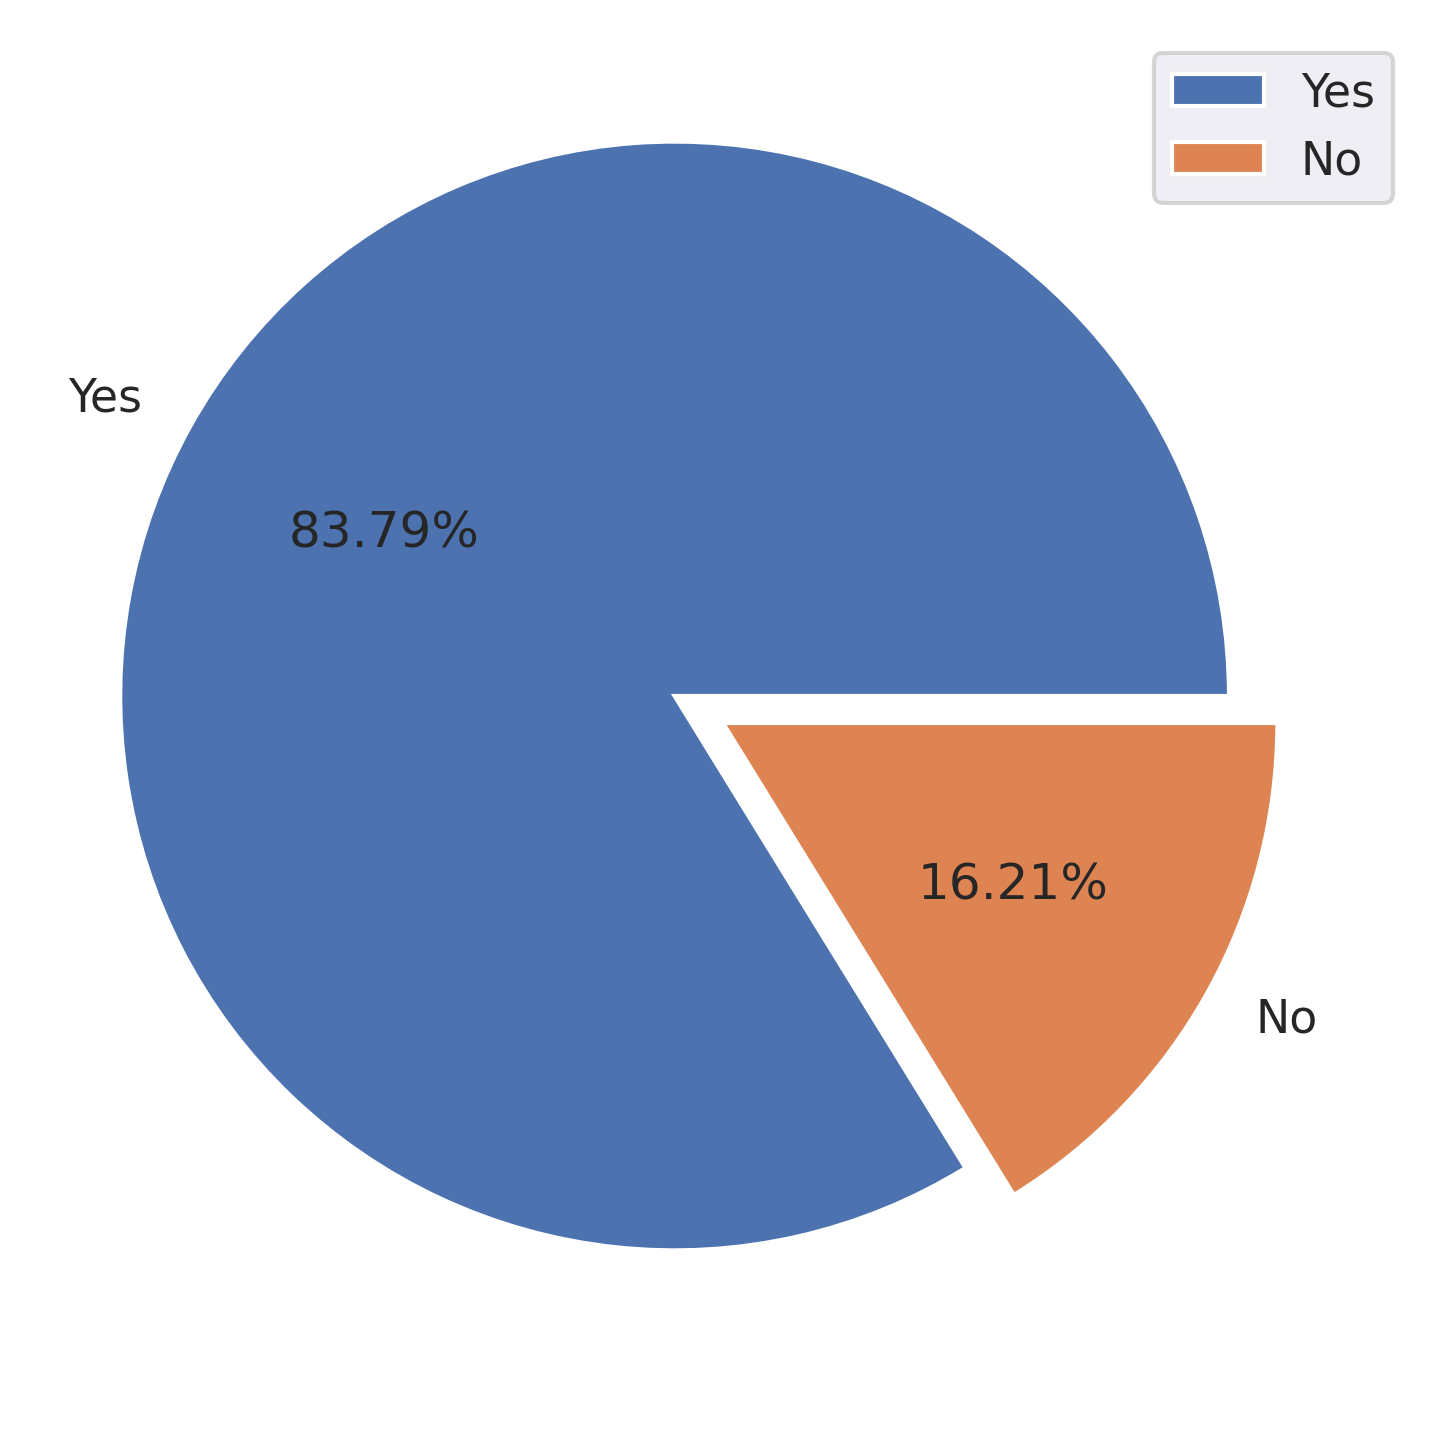

In [9]:
x = round(df["SeniorCitizen"].value_counts()/df.shape[0]*100,2)
plt.pie(x,labels = ["Yes", "No"],  explode = [0.1,0], autopct= '%.2f%%')
plt.legend()
plt.show()

## What is the ratio between who has partners and not in the company?

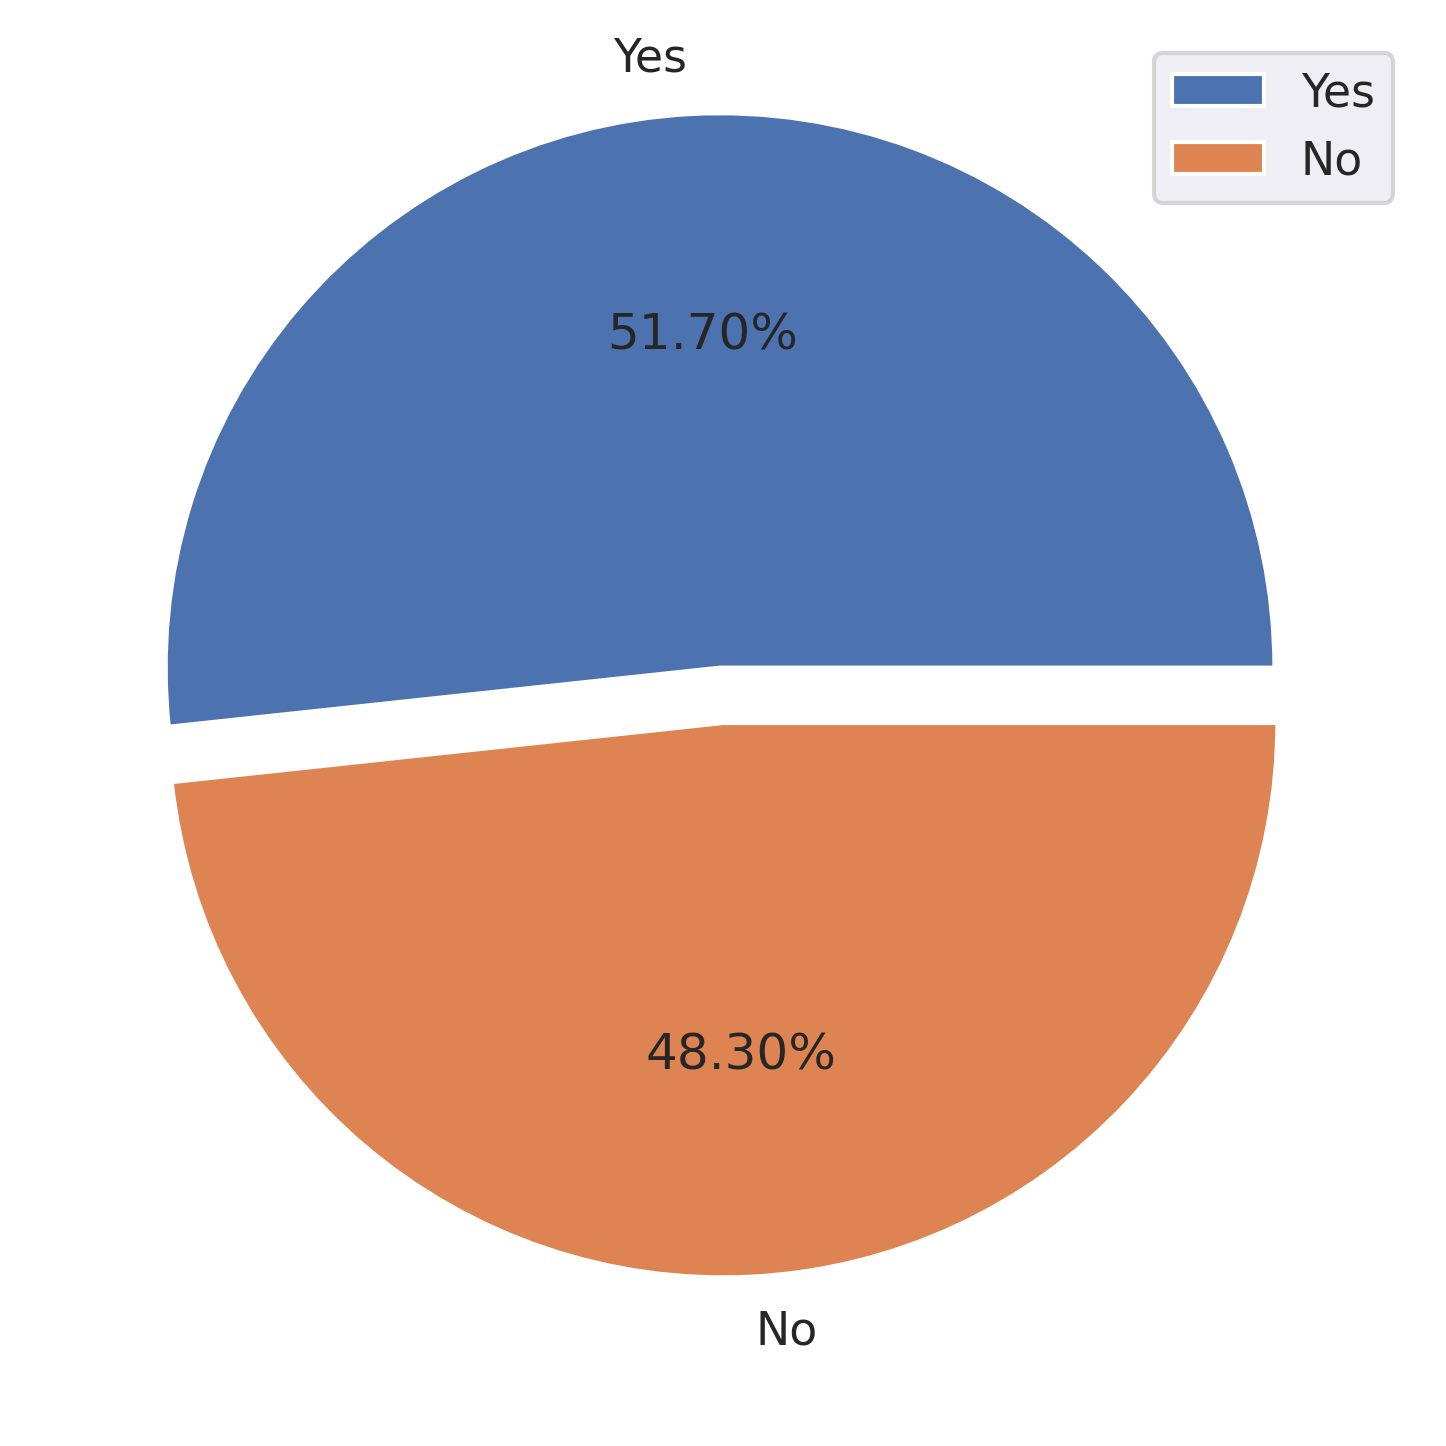

In [10]:
x = round(df["Partner"].value_counts()/df.shape[0]*100,2)
plt.pie(x,labels = ["Yes", "No"],  explode = [0.1,0], autopct= '%.2f%%')
plt.legend()
plt.show()

## What is the ratio between who has dependents and not in the company?

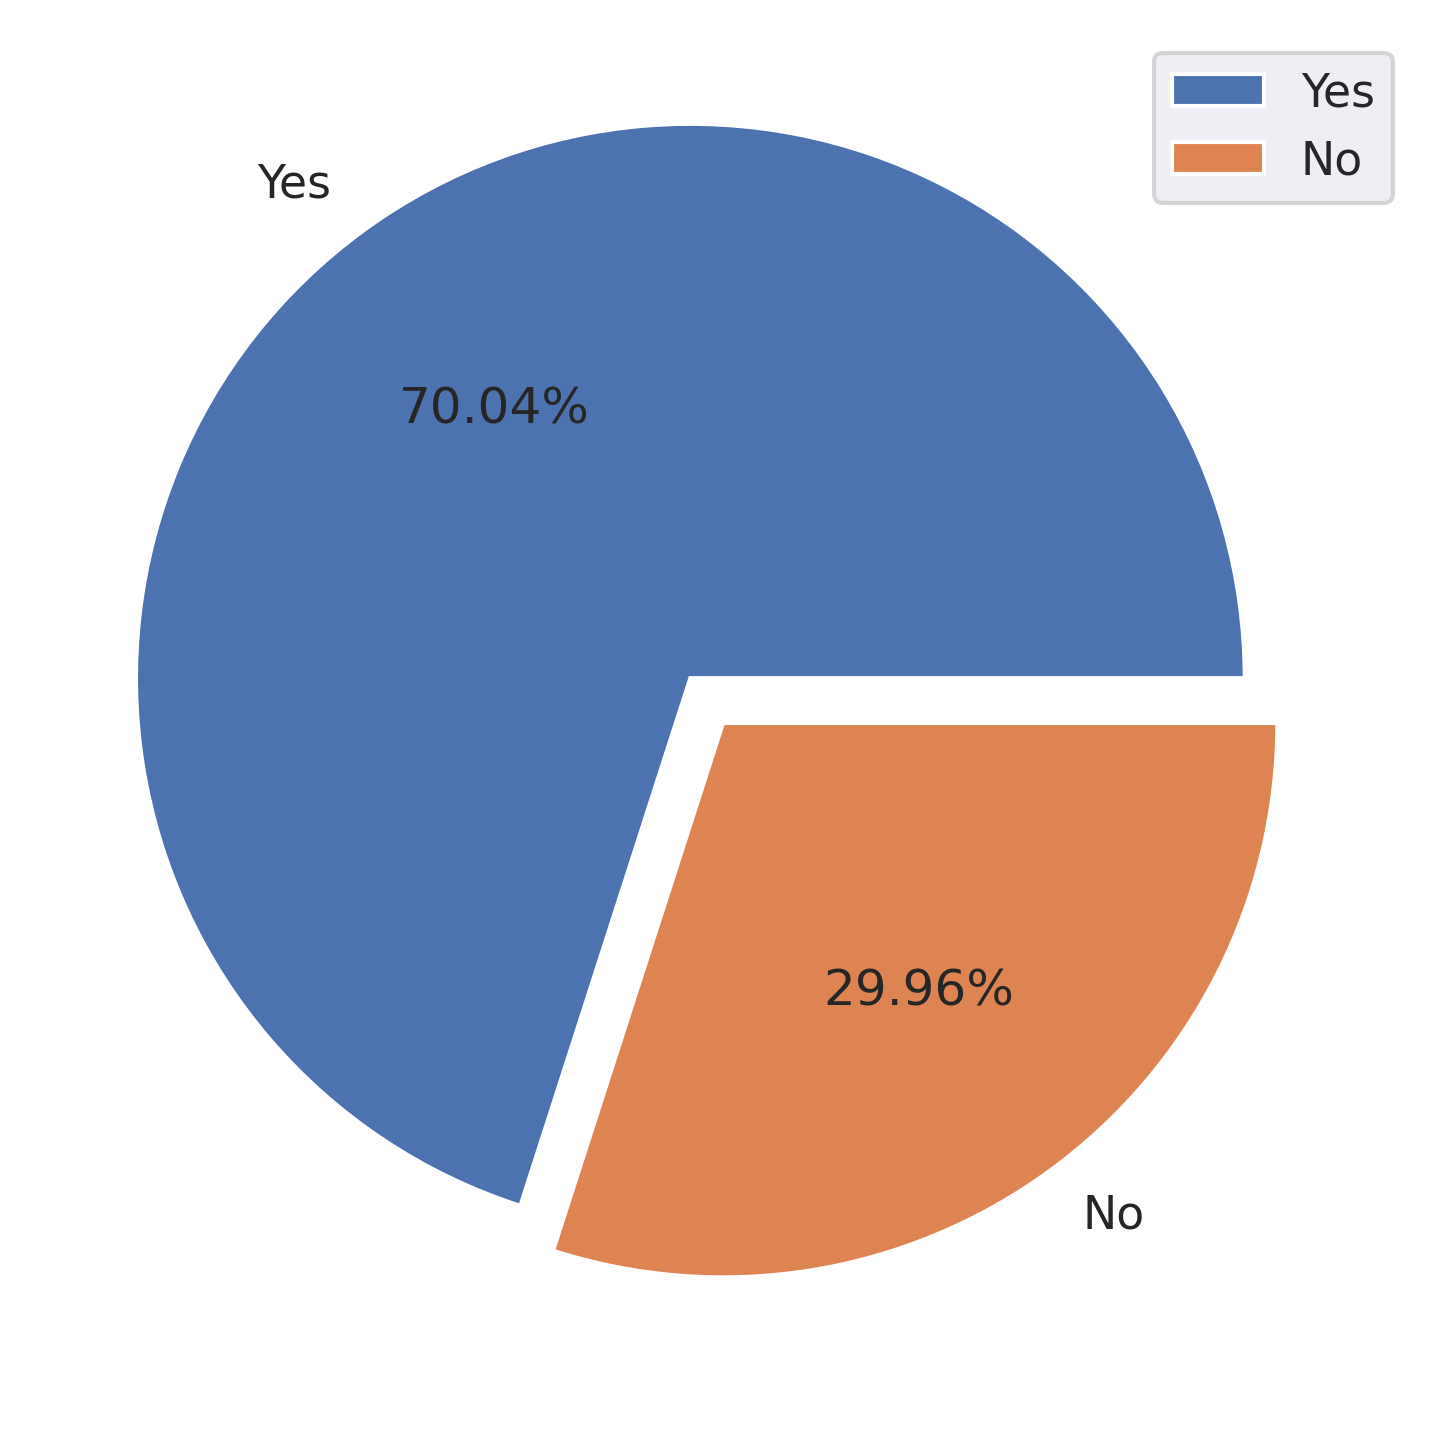

In [11]:
x = round(df["Dependents"].value_counts()/df.shape[0]*100,2)
plt.pie(x,labels = ["Yes", "No"],  explode = [0.1,0], autopct= '%.2f%%')
plt.legend()
plt.show()

## What is the ratio between who has MultipleLines and not in the company?

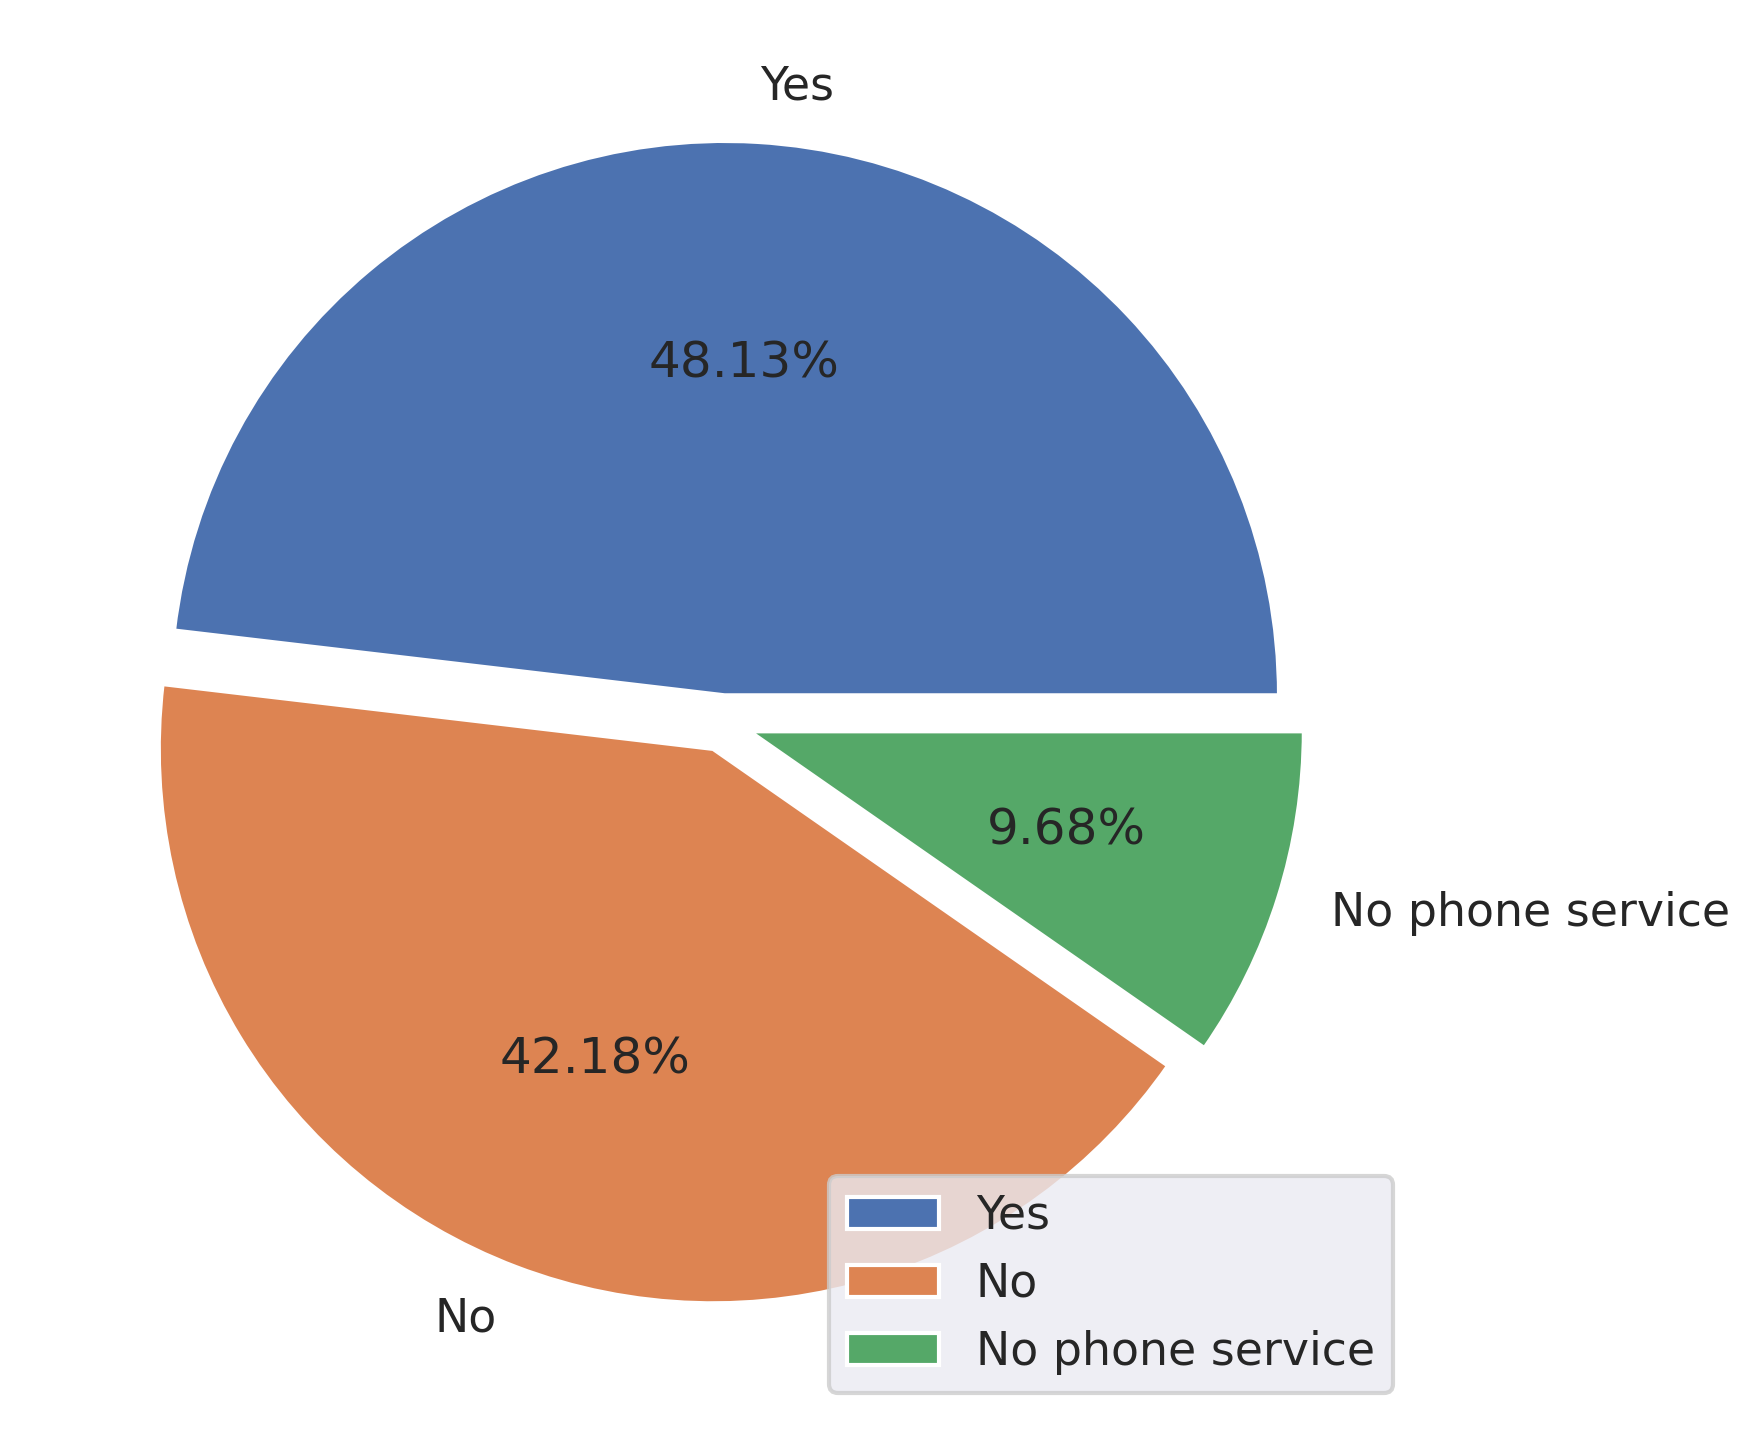

In [12]:
x = round(df["MultipleLines"].value_counts()/df.shape[0]*100,2)
plt.pie(x,labels = ["Yes", "No", "No phone service"],  explode = [0.05,0.05,0.05], autopct= '%.2f%%')
plt.legend(loc='lower right')
plt.show()

## What is the distribution of payment methods?

<Axes: xlabel='PaymentMethod', ylabel='count'>

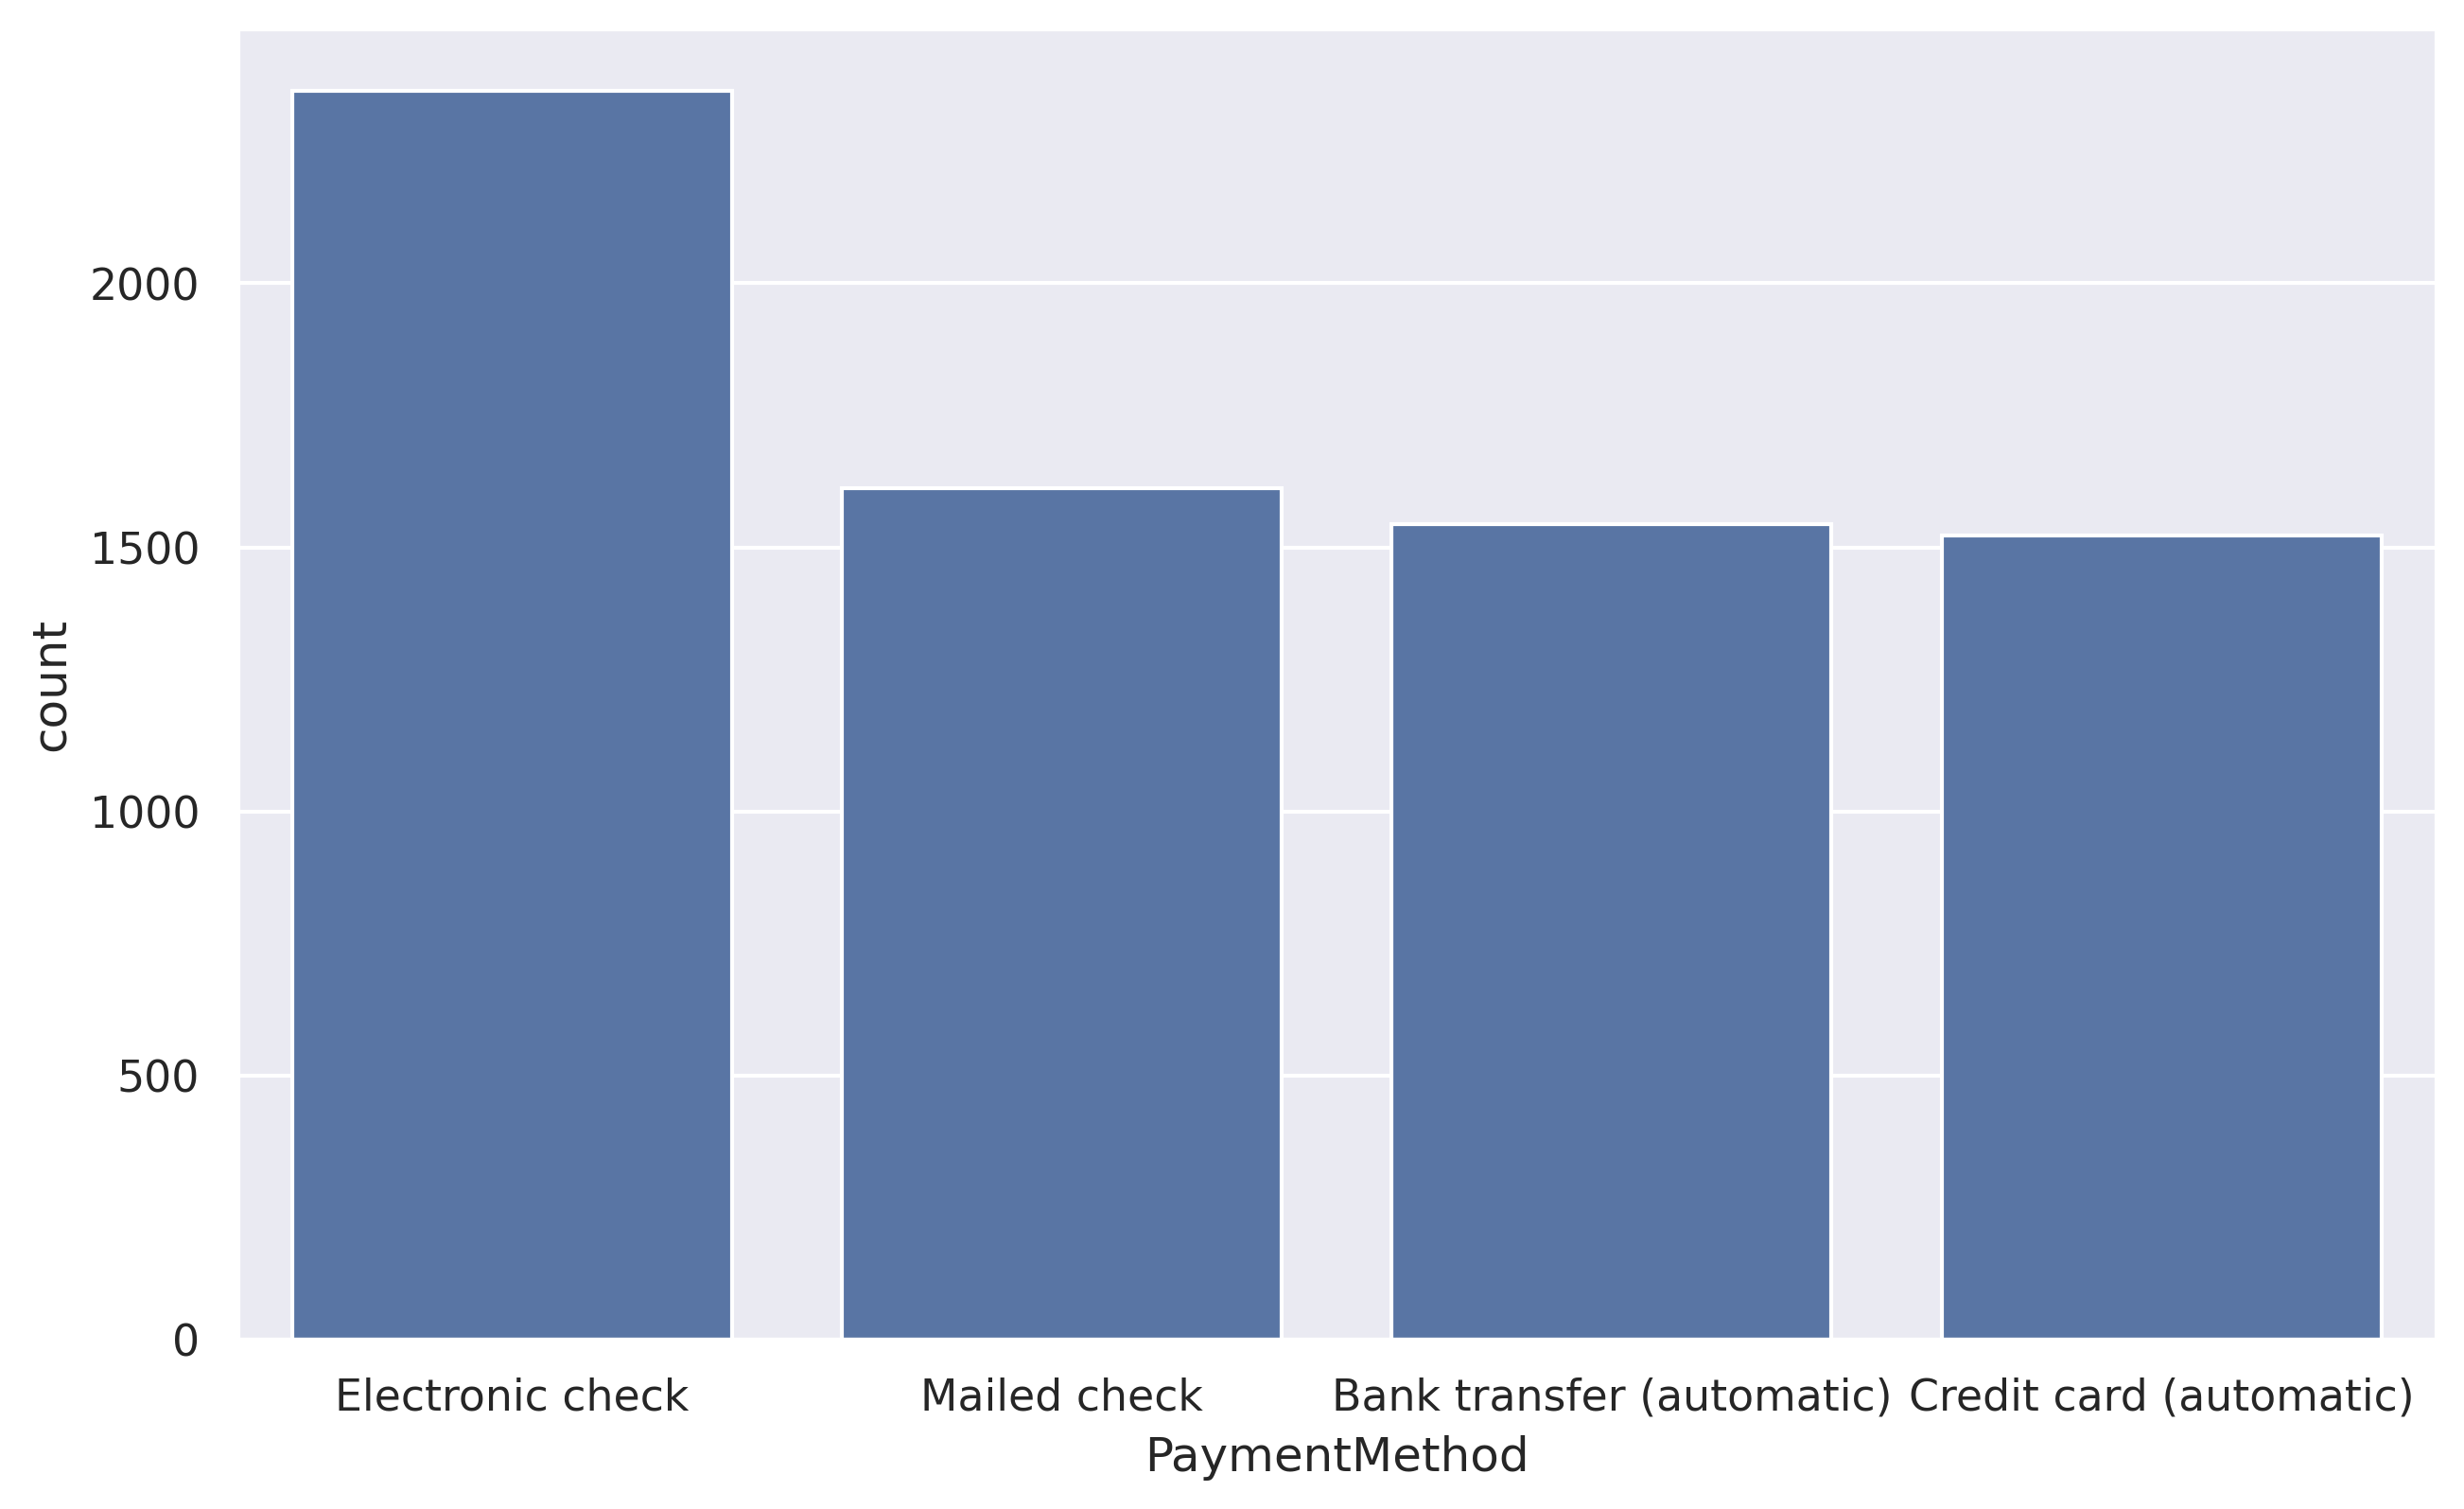

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x="PaymentMethod", data=df)

<a id="Step4"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>4. Data Preprocessing</b></p>
<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#8B0000" data-toggle="popover">Content</a>

In [14]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")

In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Handling Missing Data

In [16]:
df.TotalCharges=df.TotalCharges.fillna(0)

In [17]:
df.isnull().sum().sum()

0

## Dealing with Columns and Values in the Dataset

In [18]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

## Dealing with Values in the Columns

In [19]:
string_columns = list(df.dtypes[df.dtypes=="object"].index)
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(" ","_")
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


## Addressing the target and features

In [20]:
df.churn = (df.churn == "yes").astype(int)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


## Splitting into Dataset

In [21]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)
y_train = df_train.churn.values
y_val = df_val.churn.values
del df_train["churn"]
del df_val["churn"]

## Determining Categorical and Numerical Features

In [22]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',  
               'phoneservice', 'multiplelines', 'internetservice',  
               'onlinesecurity', 'onlinebackup', 'deviceprotection',  
               'techsupport', 'streamingtv', 'streamingmovies',  'contract', 
               'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

## One-Hot Encoding 

In [23]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")
train_dict[:1]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'month-to-month',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 3,
  'monthlycharges': 19.85,
  'totalcharges': 64.55}]

In [24]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse = False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train[0]

array([ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  1.  , 19.85,  1.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  3.  , 64.55])

In [25]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

<a id="Step5"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>5. Model Building</b></p>
<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#8B0000" data-toggle="popover">Content</a>

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

<a id="Step6"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>6. Model Evaluation</b></p>
<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#8B0000" data-toggle="popover">Content</a>

In [27]:
val_dict = df_val[categorical+numerical].to_dict(orient="records")
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred[:5]

array([[0.83279817, 0.16720183],
       [0.74686651, 0.25313349],
       [0.5643406 , 0.4356594 ],
       [0.43763388, 0.56236612],
       [0.95025844, 0.04974156]])

In [28]:
print("The performance of the model on the validation dataset: ",model.score(X_val, y_val))
print("The performance of the model on the training dataset: ",model.score(X_train, y_train))

The performance of the model on the validation dataset:  0.8034066713981547
The performance of the model on the training dataset:  0.8049704142011834


## Coefficients of the Model

In [29]:
print("Bias: ",model.intercept_[0])
print(dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3))))

Bias:  -0.14501424313805428
{'contract=month-to-month': 0.63, 'contract=one_year': -0.16, 'contract=two_year': -0.615, 'dependents=no': -0.054, 'dependents=yes': -0.091, 'deviceprotection=no': 0.027, 'deviceprotection=no_internet_service': -0.132, 'deviceprotection=yes': -0.04, 'gender=female': 0.015, 'gender=male': -0.16, 'internetservice=dsl': -0.327, 'internetservice=fiber_optic': 0.314, 'internetservice=no': -0.132, 'monthlycharges': 0.003, 'multiplelines=no': -0.225, 'multiplelines=no_phone_service': 0.124, 'multiplelines=yes': -0.044, 'onlinebackup=no': 0.076, 'onlinebackup=no_internet_service': -0.132, 'onlinebackup=yes': -0.089, 'onlinesecurity=no': 0.205, 'onlinesecurity=no_internet_service': -0.132, 'onlinesecurity=yes': -0.217, 'paperlessbilling=no': -0.241, 'paperlessbilling=yes': 0.096, 'partner=no': -0.076, 'partner=yes': -0.069, 'paymentmethod=bank_transfer_(automatic)': -0.107, 'paymentmethod=credit_card_(automatic)': -0.186, 'paymentmethod=electronic_check': 0.211, 'pa

<a id="Step7"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>7. Predicting New Data</b></p>
<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#8B0000" data-toggle="popover">Content</a>

In [30]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 2990.75,
}
x_new = dv.transform([customer])
model.predict_proba(x_new)

array([[0.93840227, 0.06159773]])

In [ ]:
customer2 = {
 'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 85.7,
 'totalcharges': 85.7
}
x_new2 = dv.transform([customer2])
model.predict_proba(x_new2)

### Thanks for reading 😀 I hope you enjoy it. If you like this notebook, please upvote it 👍
### Don't forget to follow us on [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [Instagram](http://instagram.com/tirendazacademy) | [Tiktok](https://www.tiktok.com/@tirendazacademy) 😎